In [3]:
import torch
import torch.nn as nn 
import matplotlib.pyplot as plt

In [4]:
weight = 0.7
bias = 0.3

X=torch.arange(0,1,0.02).unsqueeze(dim=1)
# Adds a new axis at dimension 1.
# (50,) → (50, 1)
# Now instead of a flat vector, it’s a column vector.
y=weight*X + bias
# print(X)
# print(y)

In [5]:
train_split = int(0.8*len(X))
X_train,y_train = X[:train_split], y[:train_split]
X_test,y_test = X[train_split:], y[train_split:]

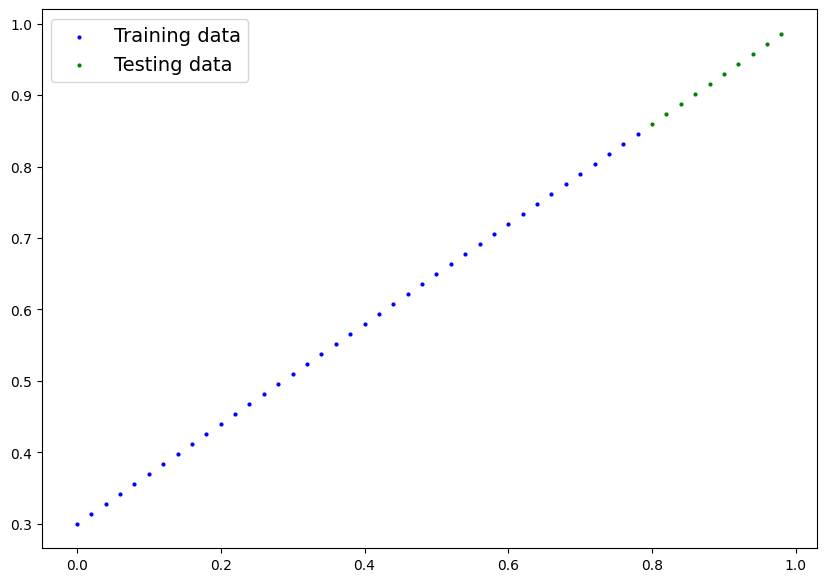

In [6]:
def plot_prediction(train_data=X_train,train_labes=y_train,test_data = X_test,test_labels=y_test,prediction=None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data,train_labes,c="b",s=4,label="Training data")
    plt.scatter(test_data,test_labels,c="g",s=4,label="Testing data")
    if prediction is not None:
        plt.scatter(test_data,prediction,c="r",s=4,label="Prediction")
    plt.legend(prop={"size":14})
    plt.show()
plot_prediction()

## torch.nn
Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way).

## torch.nn.Parameter 	
Stores tensors that can be used with nn.Module. If requires_grad=True gradients (used for updating model parameters via gradient descent) are calculated automatically, this is often referred to as "autograd".

## torch.nn.Module 	
The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass nn.Module. Requires a forward() method be implemented.

## torch.optim 	
Contains various optimization algorithms (these tell the model parameters stored in nn.Parameter how to best change to improve gradient descent and in turn reduce the loss).

## def forward() 	
All nn.Module subclasses require a forward() method, this defines the computation that will take place on the data passed to the particular nn.Module (e.g. the linear regression formula above).

In [7]:
# LinearRegressionModel inherits nn.Module
# nn.Module is a base class for all PyTorch models.
# super().__init__() initializes all the internal mechanisms of nn.Module, such as:
# Registering parameters and submodules
# Setting up hooks for forward/backward pass
# Internal tracking for state_dict()

class LinearRegressionModel(nn.Module):
  def __init__(self,):
    super().__init__()
    # nn.Parameter is a special kind of tensor that is automatically registered as a parameter when assigned as an attribute to an nn.Module subclass.
    
    self.weight = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)
    
  # forward method defines the computation performed at every call.
  # It should take input tensors and return output tensors.
  def forward(self, x):
    return self.weight * x + self.bias

`torch.inference_mode() is used when using a model for inference (making predictions).torch.inference_mode() turns off a bunch of things (like gradient tracking, which is necessary for training but not for inference) to make forward-passes (data going through the forward() method) faster.`

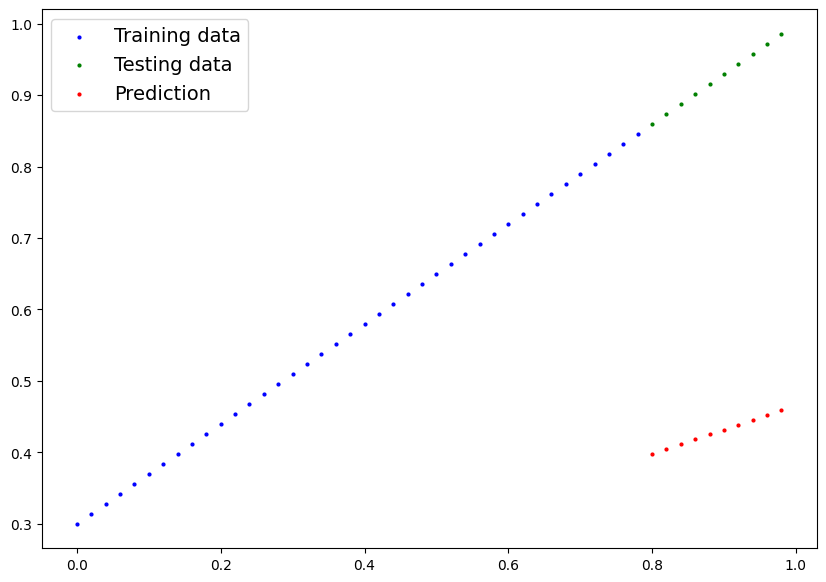

In [8]:
torch.manual_seed(42)
model_0 =LinearRegressionModel()
# list(model_0.parameters())
# model_0.state_dict()
# model_0.weight, model_0.bias
# model_0.

model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)
# y_preds
plot_prediction(prediction=y_preds)


we'll use SGD, torch.optim.SGD(params, lr) where:

    params is the target model parameters you'd like to optimize (e.g. the weights and bias values we randomly set before).

    _lr is the learning rate you'd like the optimizer to update the parameters at, higher means the optimizer will try larger updates (these can sometimes be too large and the optimizer will fail to work), lower means the optimizer will try smaller updates (these can sometimes be too small and the optimizer will take too long to find the ideal values). The learning rate is considered a hyperparameter (because it's set by a machine learning engineer). Common starting values for the learning rate are 0.01, 0.001, 0.0001, however, these can also be adjusted over time (this is called learning rate scheduling)._


In [9]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.001)

In [10]:
for epoch in range(10):
 
  model_0.train()
  # pass the data through the model
  # this will perform the forward method
  y_pred = model_0(X_train)
  # calculate the loss
  loss = loss_fn(y_pred,y_train)
  # zero grad the optimizer (sets gradients to zero)
  # loss.backward() calculates the gradients of the loss with respect to the parameters (weight and bias)
  # optimizer.step() updates the parameters using the calculated gradients and the learning rate
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

In [ ]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside 
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()
    print()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.18615040183067322 | MAE Test Loss: 0.34500852227211 
Epoch: 10 | MAE Train Loss: 0.17462942004203796 | MAE Test Loss: 0.33153754472732544 
Epoch: 20 | MAE Train Loss: 0.16310855746269226 | MAE Test Loss: 0.3180667459964752 
Epoch: 30 | MAE Train Loss: 0.15158770978450775 | MAE Test Loss: 0.304595947265625 
Epoch: 40 | MAE Train Loss: 0.14006686210632324 | MAE Test Loss: 0.2911251187324524 
Epoch: 50 | MAE Train Loss: 0.12854602932929993 | MAE Test Loss: 0.2776543200016022 
Epoch: 60 | MAE Train Loss: 0.11702518165111542 | MAE Test Loss: 0.26418352127075195 
Epoch: 70 | MAE Train Loss: 0.10654274374246597 | MAE Test Loss: 0.251315176486969 
Epoch: 80 | MAE Train Loss: 0.09747617691755295 | MAE Test Loss: 0.2392154484987259 
Epoch: 90 | MAE Train Loss: 0.08973254263401031 | MAE Test Loss: 0.22795839607715607 


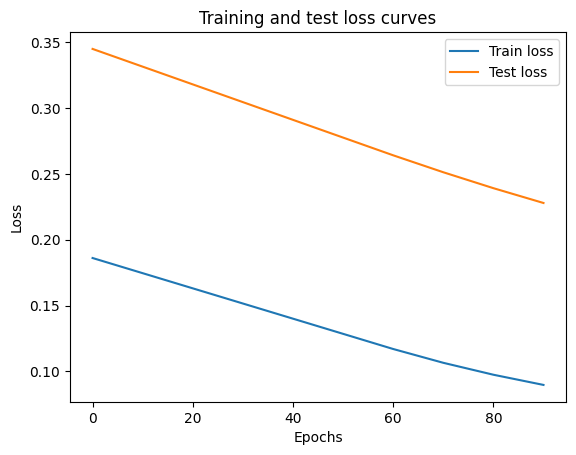

In [14]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

There are three things to remember when making predictions (also called performing inference) with a PyTorch model:

    Set the model in evaluation mode (model.eval()).
    Make the predictions using the inference mode context manager (with torch.inference_mode(): ...).
    All predictions should be made with objects on the same device (e.g. data and model on GPU only or data and model on CPU only).


In [15]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)
y_preds

tensor([[0.6669],
        [0.6753],
        [0.6836],
        [0.6920],
        [0.7004],
        [0.7087],
        [0.7171],
        [0.7255],
        [0.7338],
        [0.7422]])